In [1]:
import requests
import locale
import requests
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = ""

In [44]:
response = requests.get('https://api.themoviedb.org/3/trending/all/day?api_key=' + api_key)
trending = response.json()
trends = trending['results']

In [3]:
link = "https://api.themoviedb.org/3/discover/movie?api_key="+api_key

In [4]:
response = requests.get(link + '&primary_release_year=2017&sort_by=revenue.desc')

In [46]:
highest_revenue =response.json()
highest_revenue_films = highest_revenue['results']

In [33]:
columns = ['film', 'revenue']

df = pd.DataFrame(columns=columns)

In [34]:
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    locale.currency(film_revenue['revenue'], grouping=True )
    df = df[df.film != 'Italy Italy']
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe    

In [35]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-5)
    return '${:1.0f}K'.format(x*1e-2)

In [36]:
df.columns

Index(['film', 'revenue'], dtype='object')

[Text(0,0.5,'Film'),
 Text(0.5,0,'Revenue'),
 Text(0.5,1,'American Films with Highest Revenue (2017)')]

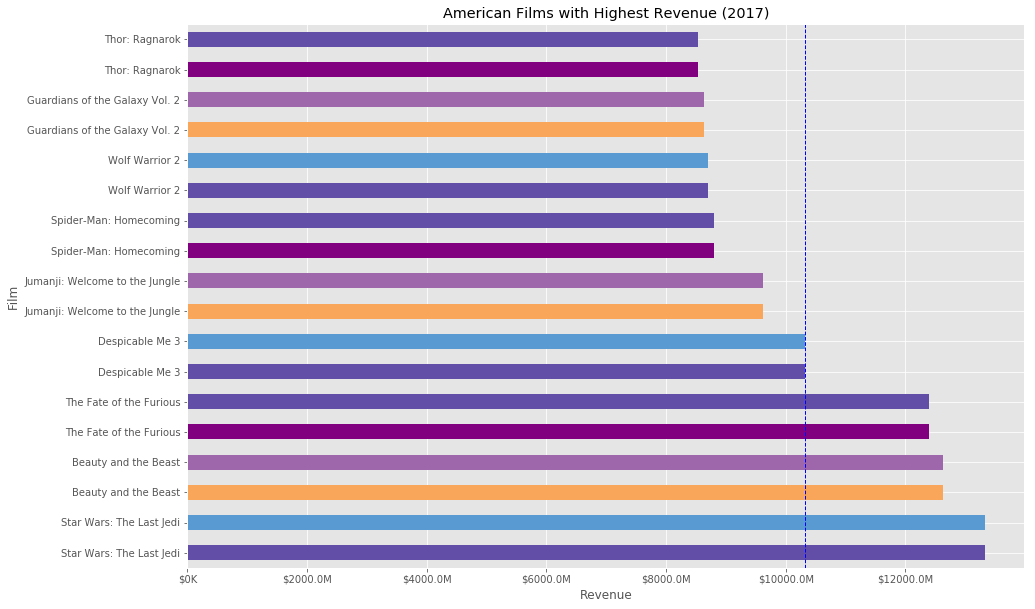

In [37]:
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,10))
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x='film', ax=ax)

#format xaxis in terms of currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

avg = df['revenue'].mean()

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (2017)', xlabel='Revenue', ylabel='Film')



In [ ]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()
highest_revenue_films_ever = highest_revenue_ever['results']

columns = ['film', 'revenue', 'budget', 'release_date']
highest_revenue_ever_df = pd.DataFrame(columns=columns)

for film in highest_revenue_films_ever:
    # print(film['title'])

    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    # print(film_revenue)

    # print(locale.currency(film_revenue['revenue'], grouping=True ))

    # Lord of the Rings duplicate w/ bad data was being returned  https://www.themoviedb.org/movie/454499-the-lord-of-the-rings
    # It's budget was $281 which is way too low for a top-earning film. Therefore in order to be added to dataframe the film
    # budget must be greater than $281.

    if film_revenue['budget'] > 281:
        # print(film_revenue['budget'])
        # add film title, revenue, budget and release date to the dataframe
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1), film_revenue['release_date']]

highest_revenue_ever_df.head()    

In [ ]:
highest_revenue_ever_df['gross'] = highest_revenue_ever_df['revenue'] + highest_revenue_ever_df['budget']


In [ ]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x='film', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='American Films with Highest Revenue (All Time)', xlabel='Revenue', ylabel='Film')

In [ ]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='gross', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x='film', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='Gross Profit of the American Films with Highest Revenue (All Time)', xlabel='Gross Profit', ylabel='Film')

In [ ]:
highest_revenue_ever['budget'] = pd.to_numeric(highest_revenue_ever_df.budget)

In [ ]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind='scatter', y='gross', x='budget', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.set(title='Profit vs Budget of the American Films with Highest Revenue (All Time)', xlabel='Budget', ylabel='Gross Profit')
